In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df= pd.read_csv('house.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [143]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [144]:
df.shape

(21613, 21)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [146]:
for i in df.columns:
    print(df[i].value_counts())

795000620     3
2206700215    2
643300040     2
3333002450    2
1995200200    2
1781500435    2
3904100089    2
3323059027    2
6300000226    2
9809000020    2
723049156     2
1254200015    2
2560801222    2
6669020290    2
8651402750    2
3969300030    2
1237500540    2
4154300296    2
4302201085    2
1450100390    2
9250900104    2
4443800385    2
2892700041    2
5127001320    2
5083000375    2
2621600015    2
7129304540    2
4222310010    2
5101405604    2
2619920170    2
             ..
2516000475    1
9454200030    1
8857640710    1
7519001825    1
3992700130    1
7515000035    1
5608010980    1
475000510     1
4038300010    1
9238480020    1
9492500170    1
8165500110    1
1931300035    1
1525200060    1
880000189     1
7974200510    1
6815100095    1
2617300160    1
2768100545    1
3324069058    1
2607740100    1
880000205     1
1922000070    1
7893808220    1
3333002440    1
3420069065    1
7812801125    1
4364700875    1
3021059276    1
1777500160    1
Name: id, Length: 21436,

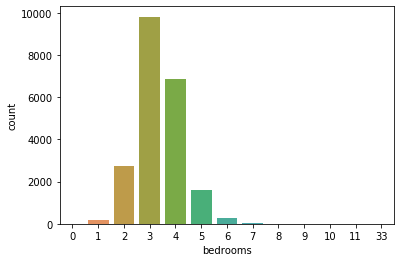

In [147]:
sns.countplot(df['bedrooms'])

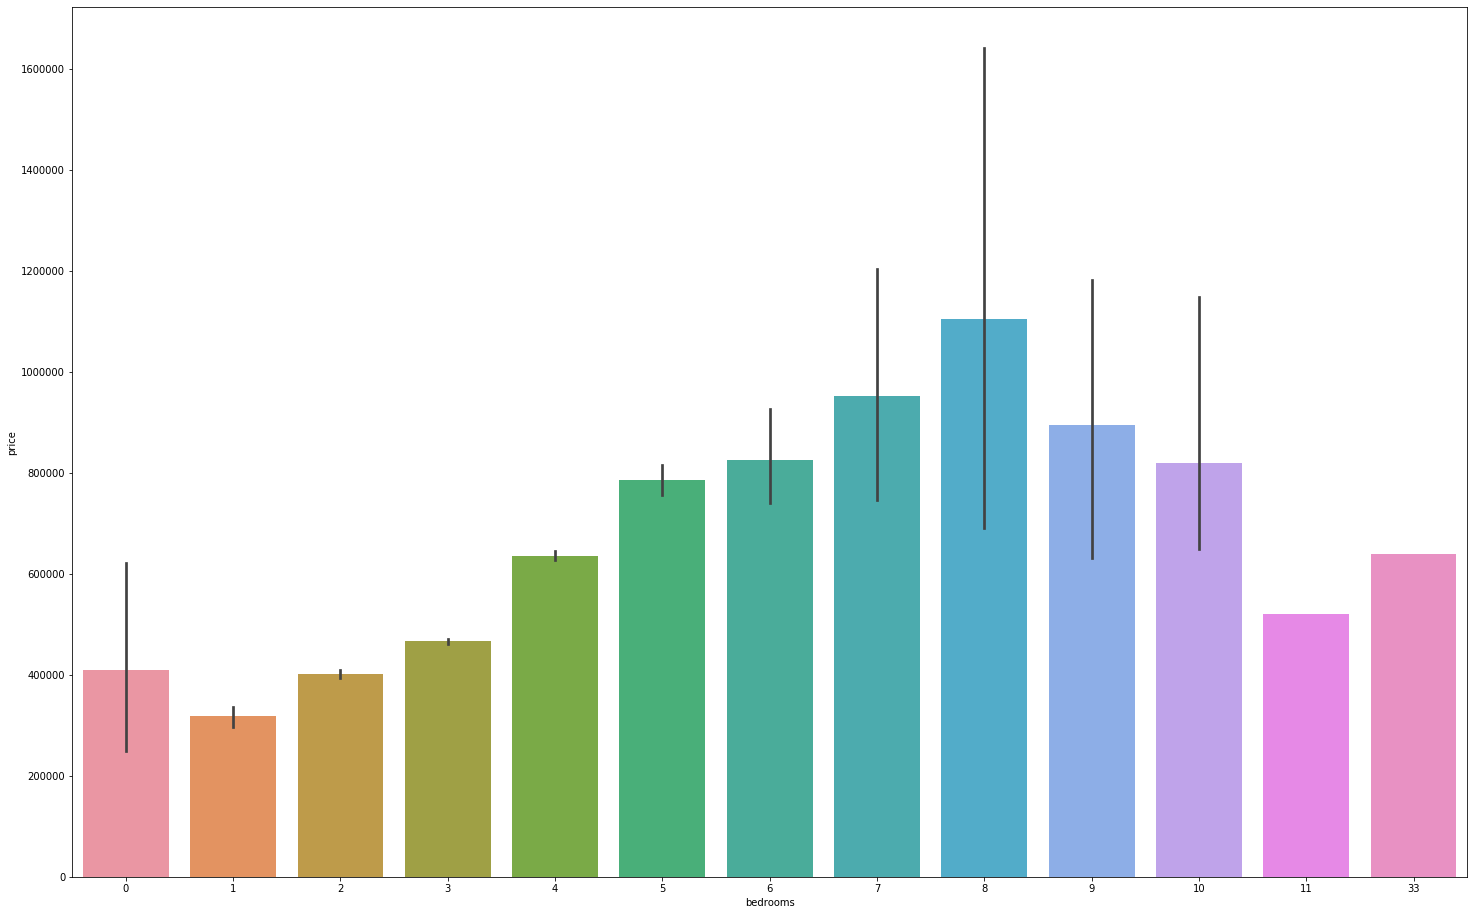

In [148]:
plt.figure(figsize=(25,16))
sns.barplot(x=df['bedrooms'], y=df['price'])

[Text(0, 0.5, 'Price of the house'), Text(0.5, 0, 'Sqft Living Space')]

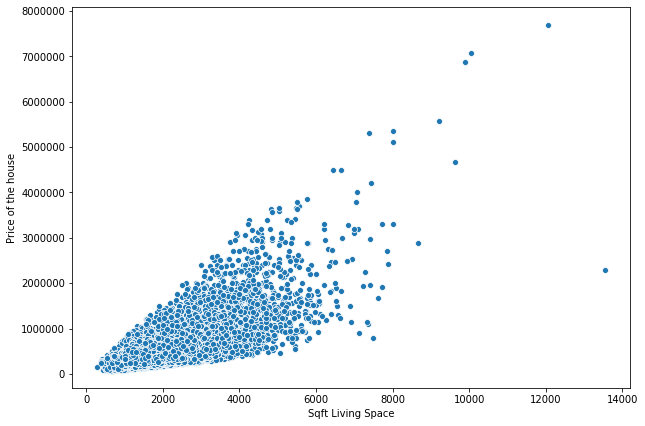

In [149]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='sqft_living', y='price', data=df).set(xlabel='Sqft Living Space', ylabel='Price of the house')


[Text(0, 0.5, 'Price'),
 [Text(0, 0, 'Do not have waterfront'), Text(0, 0, 'Have waterfront')],
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Comparison of prices for houses having a waterfront or not')]

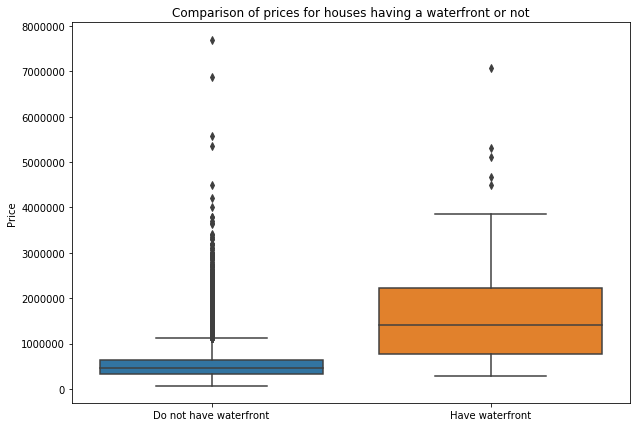

In [150]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='waterfront', y='price', data=df).set(xlabel='', ylabel='Price', title='Comparison of prices for houses having a waterfront or not',
                                                        xticklabels=['Do not have waterfront', 'Have waterfront'])

[Text(0, 0.5, 'Price'),
 [Text(0, 0, 'Do not have waterfront'), Text(0, 0, 'Have waterfront')],
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Number of waterfront and non waterfront houses')]

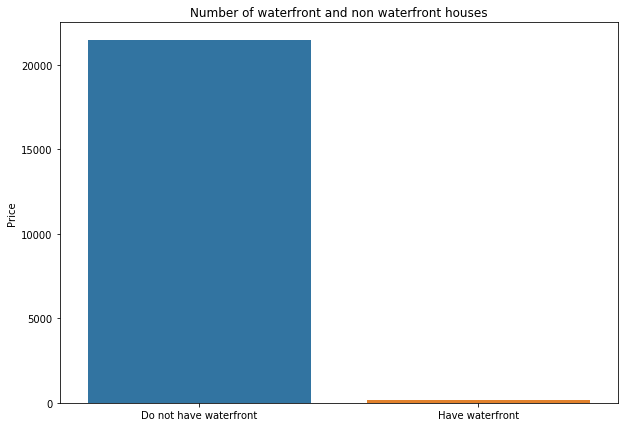

In [151]:
plt.figure(figsize=(10, 7))
sns.countplot(x='waterfront', data=df).set(xlabel='', ylabel='Price', title='Number of waterfront and non waterfront houses',
                                             xticklabels=['Do not have waterfront', 'Have waterfront'])

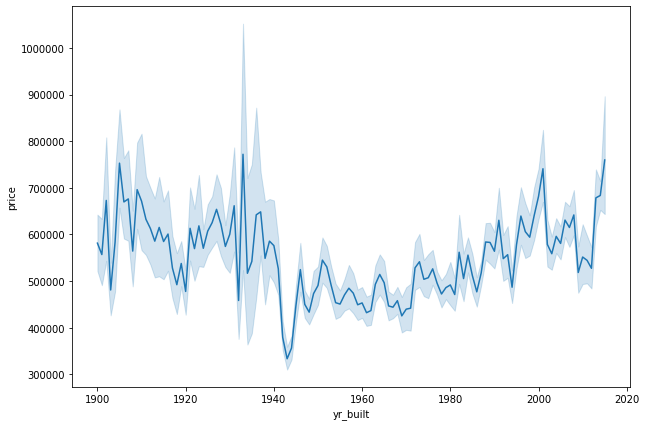

In [152]:
plt.figure(figsize=(10, 7))
sns.lineplot(x='yr_built', y='price', data=df)

In [153]:
df['century_old'] = df['yr_built'].apply(lambda year: 1 if year <= 1915 else 0)


[Text(0, 0.5, 'Price'),
 [Text(0, 0, 'Less than 100 years old'), Text(0, 0, 'Over a 100 years Old')],
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Comparison of prices depending on the year the house was built')]

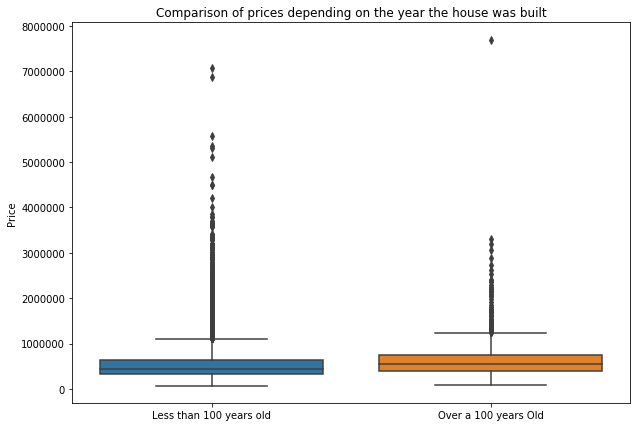

In [154]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='century_old', y='price', data=df).set(xlabel='', ylabel='Price', title='Comparison of prices depending on the year the house was built',
                                                        xticklabels=['Less than 100 years old', 'Over a 100 years Old'])

[Text(0, 0.5, 'Price'),
 [Text(0, 0, 'Less than 100 years old'), Text(0, 0, 'Over a 100 years Old')],
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Number of Houses according to thier age')]

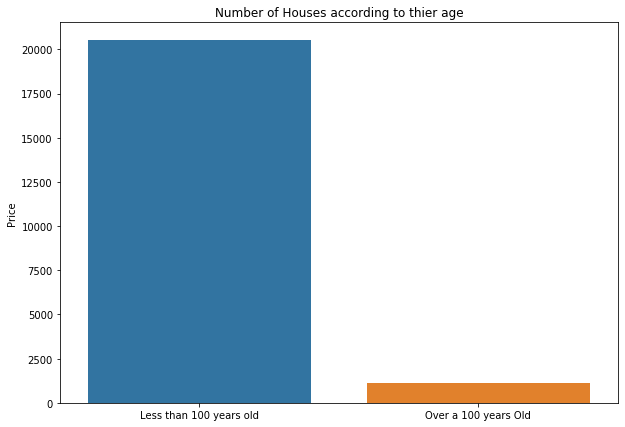

In [155]:
plt.figure(figsize=(10, 7))
sns.countplot(x='century_old', data=df).set(xlabel='', ylabel='Price', title='Number of Houses according to thier age',
                                                xticklabels=['Less than 100 years old', 'Over a 100 years Old'])


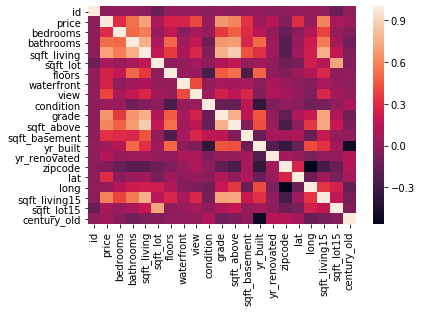

In [170]:
corr=df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

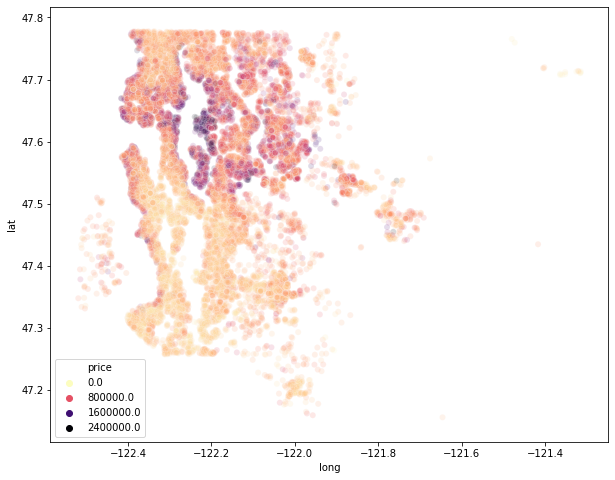

In [156]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='long', y='lat', data=df[df['price'] < 2000000], hue='price', palette='magma_r', alpha=0.15)


In [115]:
d =[]
for i in df['date'].values:
    d.append(i[:4])
df['date'] = d

In [116]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [117]:
for i in df.columns:
    df[i]=df[i].astype(float)

In [118]:
df['age'] = df['date'] - df['yr_built']

In [119]:
df['renov_age'] = np.abs(df['yr_renovated'] - df['yr_built'])
df['renov_age'] = df.renov_age.apply(lambda x: x if len(str(int(x)))==2 else 0.0)

In [120]:
df.drop(['id','date', 'yr_built', 'yr_renovated'], axis=1, inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renov_age
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,59.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,98125.0,47.7210,-122.319,1690.0,7639.0,63.0,40.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,82.0,0.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,98136.0,47.5208,-122.393,1360.0,5000.0,49.0,0.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,28.0,0.0


In [121]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 30 , 30 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 21 }

        )

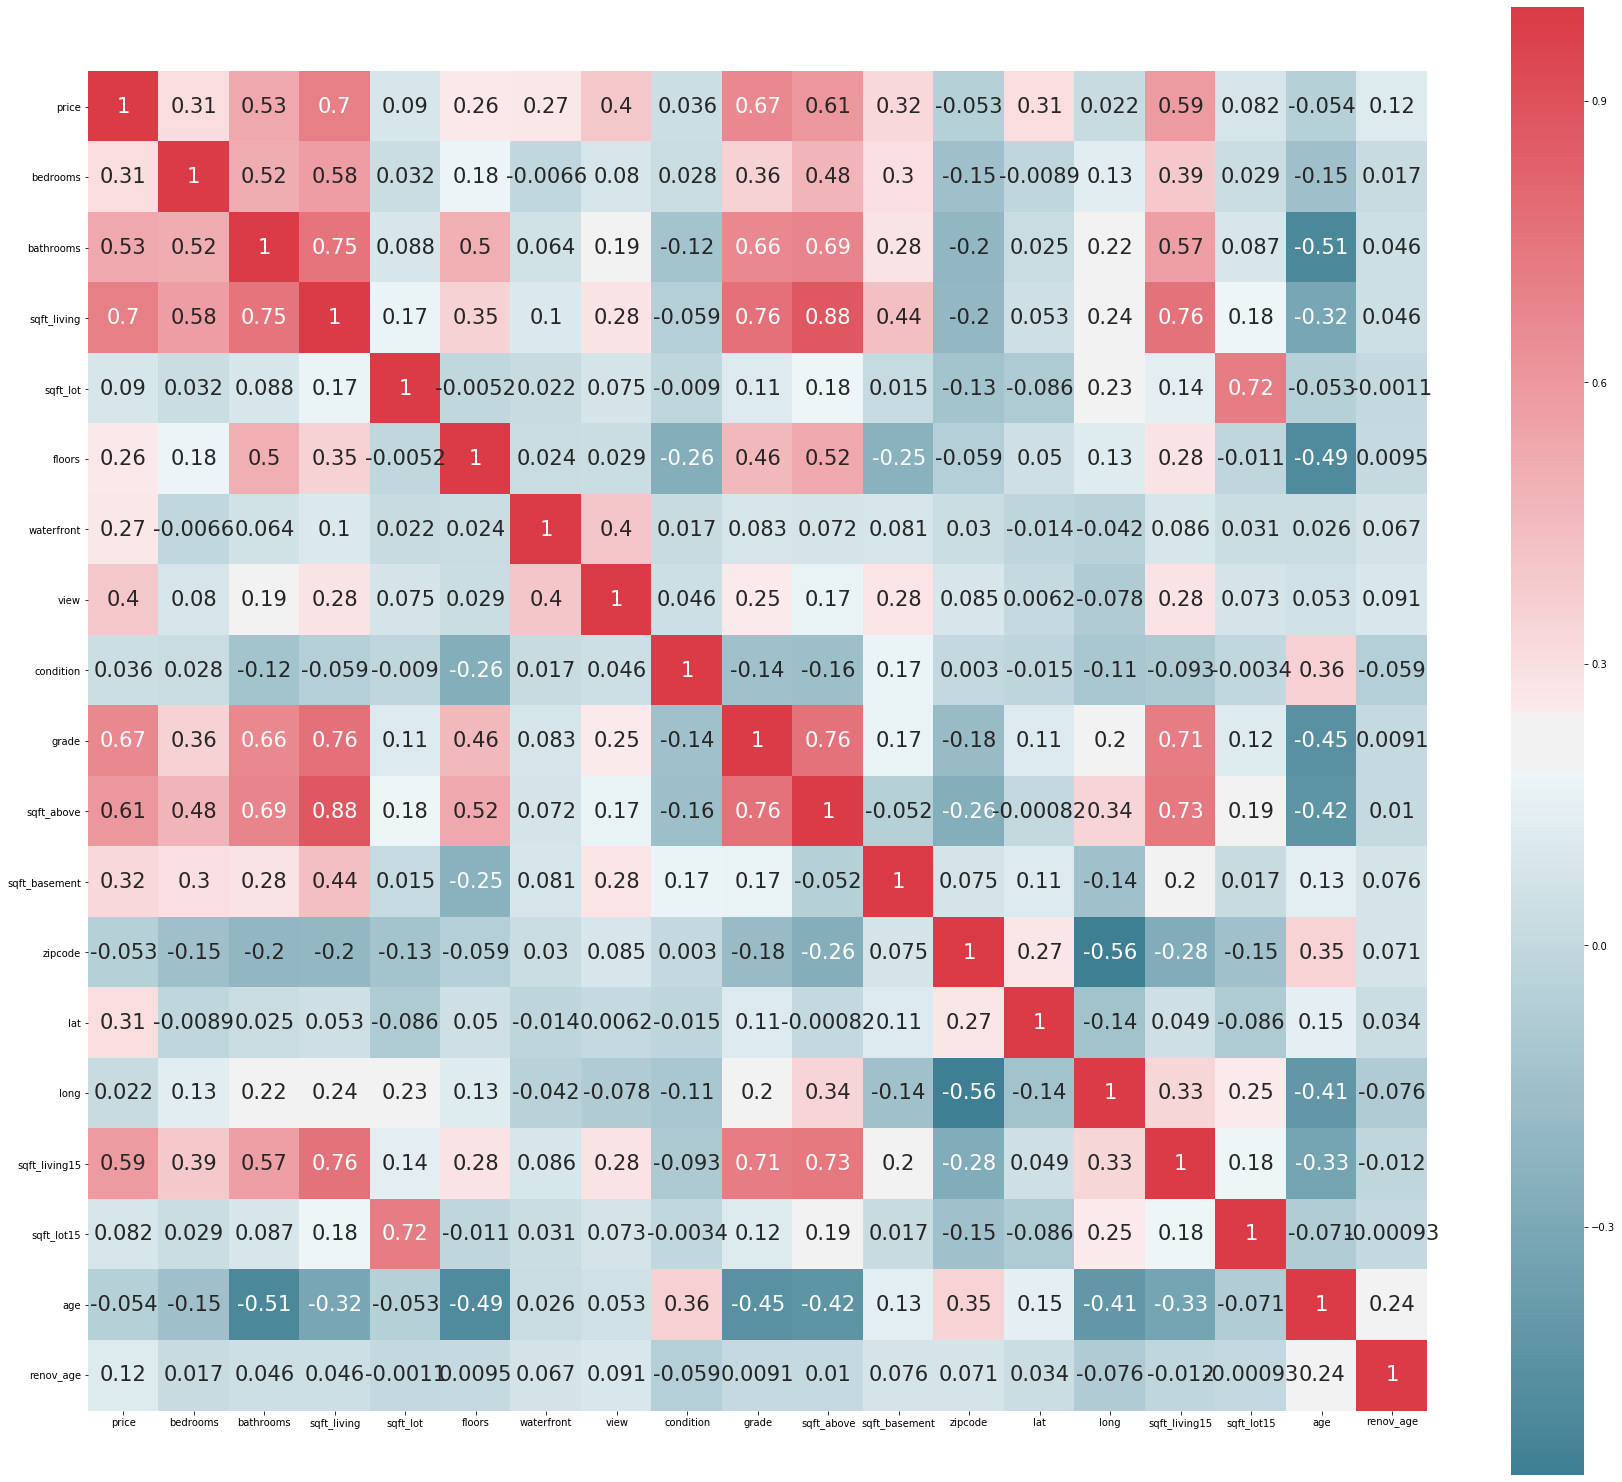

In [122]:
plot_correlation_map( df )

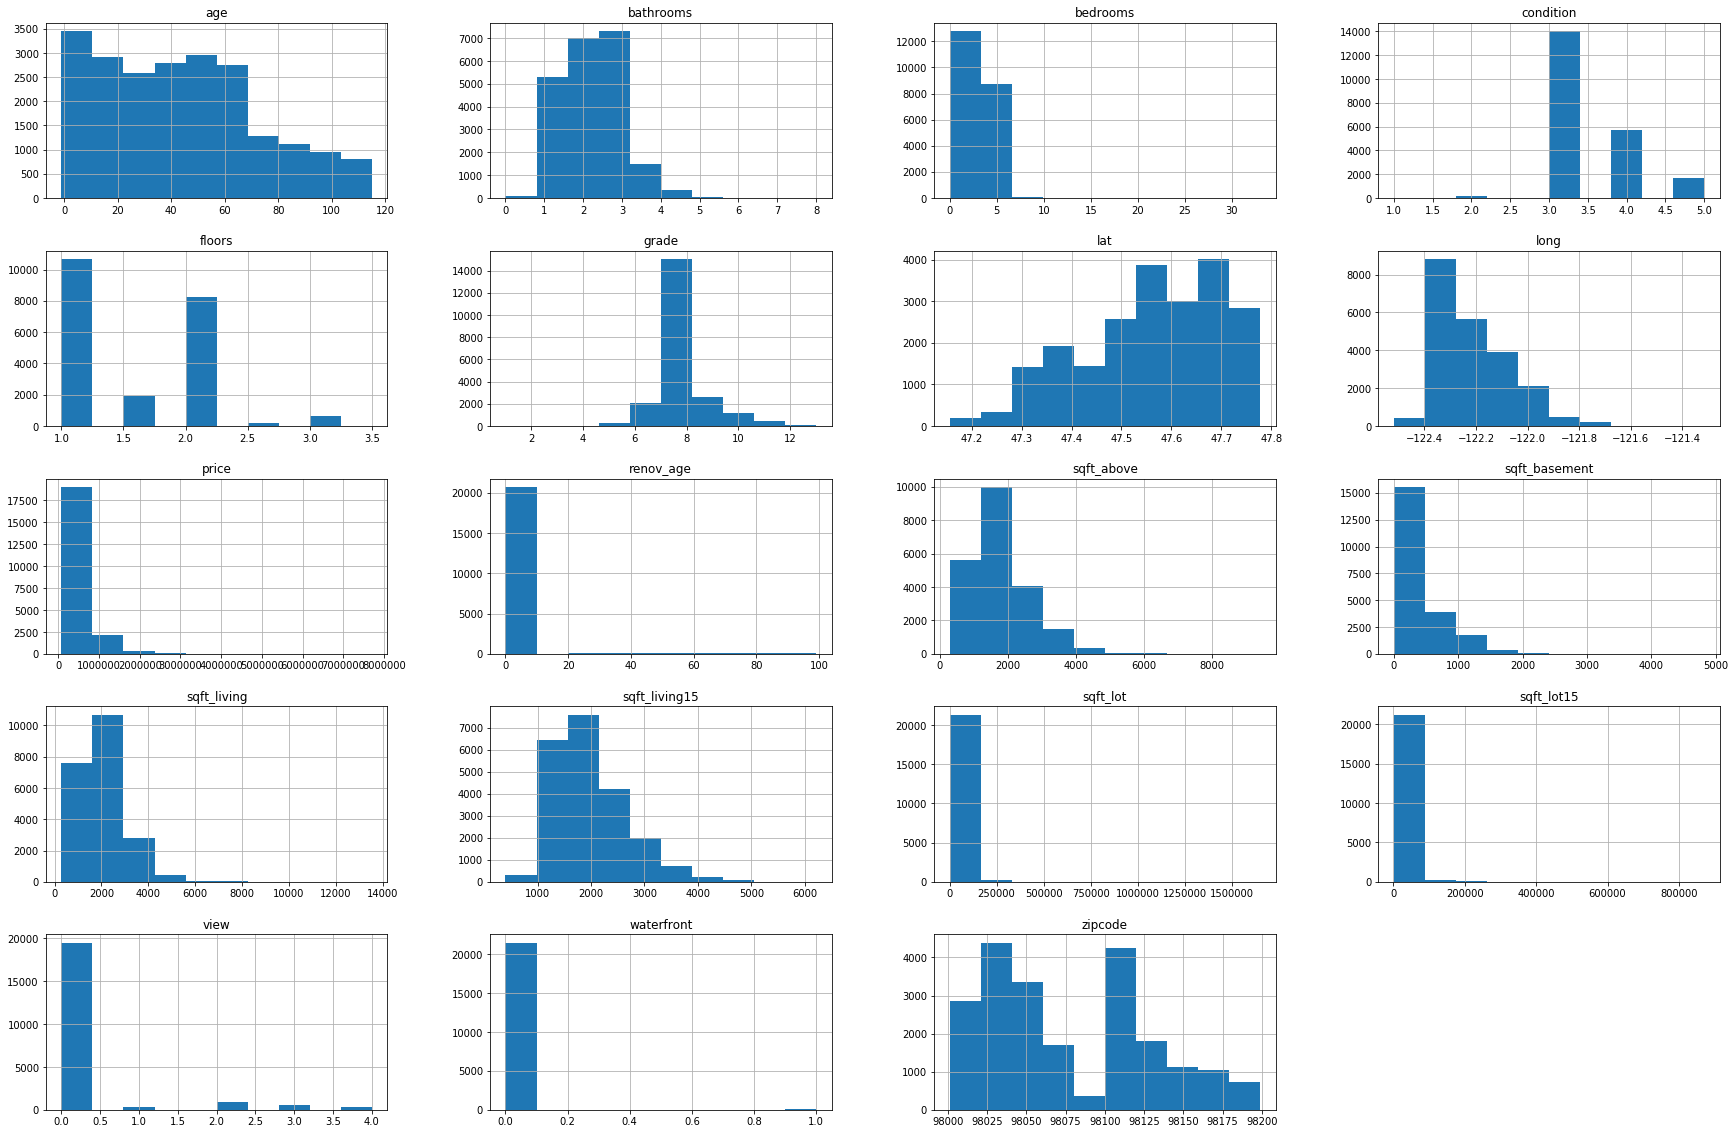

In [123]:
df.hist(figsize=(30,20))
plt.show()

In [124]:
corr_features =[]

for i , r in df.corr().iterrows():
    k=0
    for j in range(len(r)):
        if i!= r.index[k]:
            if r.values[k] >=0.5:
                corr_features.append([i, r.index[k], r.values[k]])
        k += 1
corr_features

[['price', 'bathrooms', 0.5251375054139724],
 ['price', 'sqft_living', 0.7020350546118009],
 ['price', 'grade', 0.667434256020255],
 ['price', 'sqft_above', 0.6055672983560842],
 ['price', 'sqft_living15', 0.5853789035795697],
 ['bedrooms', 'bathrooms', 0.5158836376158442],
 ['bedrooms', 'sqft_living', 0.5766706925022366],
 ['bathrooms', 'price', 0.5251375054139724],
 ['bathrooms', 'bedrooms', 0.5158836376158442],
 ['bathrooms', 'sqft_living', 0.7546652789673779],
 ['bathrooms', 'floors', 0.5006531725878427],
 ['bathrooms', 'grade', 0.6649825338781631],
 ['bathrooms', 'sqft_above', 0.6853424758761738],
 ['bathrooms', 'sqft_living15', 0.5686342895782329],
 ['sqft_living', 'price', 0.7020350546118009],
 ['sqft_living', 'bedrooms', 0.5766706925022366],
 ['sqft_living', 'bathrooms', 0.7546652789673779],
 ['sqft_living', 'grade', 0.7627044764584873],
 ['sqft_living', 'sqft_above', 0.8765965986813212],
 ['sqft_living', 'sqft_living15', 0.7564202590172227],
 ['sqft_lot', 'sqft_lot15', 0.71855

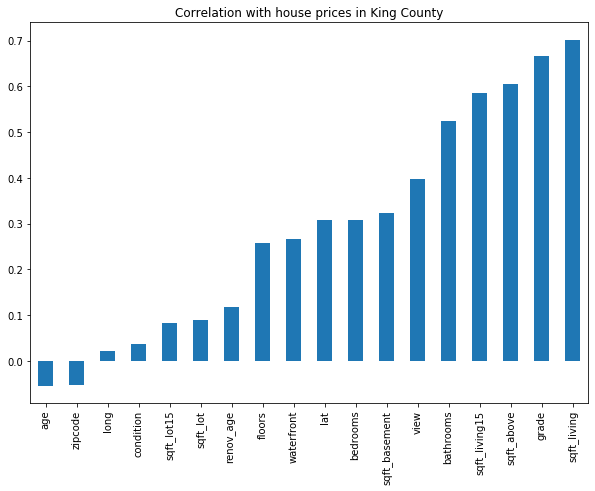

In [125]:
plt.figure(figsize=(10, 7))
df.corr().sort_values('price').drop('price')['price'].plot(kind='bar', title='Correlation with house prices in King County')

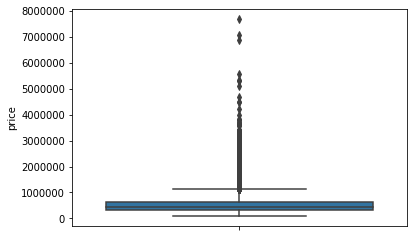

In [126]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['price']).set_title
plt.show()


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
price            21613 non-null float64
bedrooms         21613 non-null float64
bathrooms        21613 non-null float64
sqft_living      21613 non-null float64
sqft_lot         21613 non-null float64
floors           21613 non-null float64
waterfront       21613 non-null float64
view             21613 non-null float64
condition        21613 non-null float64
grade            21613 non-null float64
sqft_above       21613 non-null float64
sqft_basement    21613 non-null float64
zipcode          21613 non-null float64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null float64
sqft_lot15       21613 non-null float64
age              21613 non-null float64
renov_age        21613 non-null float64
dtypes: float64(19)
memory usage: 3.1 MB


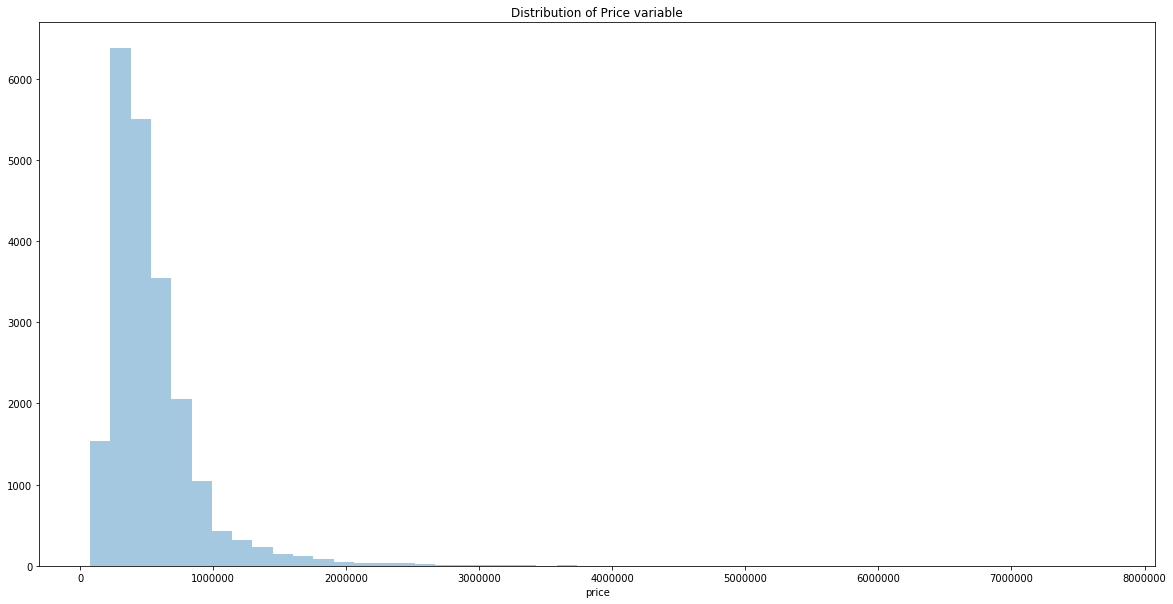

In [128]:
plt.figure(figsize=(20,10))
sns.distplot(df.price, kde=False).set_title('Distribution of Price variable')
plt.show()

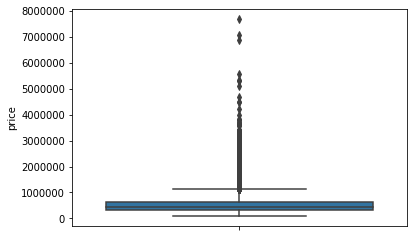

In [129]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['price']).set_title
plt.show()

In [130]:
#function that can calculate interquartile range of the data
def calc_interquartile(df, column):
    global lower, upper
    #calculating the first and third quartile
    first_quartile, third_quartile = np.percentile(df[column], 25), np.percentile(df[column], 75)
    iqr = third_quartile - first_quartile
    cutoff = iqr*1.5
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    upper_outliers = df[df[column] > upper]
    lower_outliers = df[df[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])

In [131]:
for i in df.columns:
    print('Total outliers in ', i)
    calc_interquartile(df, i)
    print()

Total outliers in  price
Lower outliers 0
Upper outliers 1146
total outliers 1146

Total outliers in  bedrooms
Lower outliers 212
Upper outliers 334
total outliers 546

Total outliers in  bathrooms
Lower outliers 14
Upper outliers 557
total outliers 571

Total outliers in  sqft_living
Lower outliers 0
Upper outliers 572
total outliers 572

Total outliers in  sqft_lot
Lower outliers 0
Upper outliers 2425
total outliers 2425

Total outliers in  floors
Lower outliers 0
Upper outliers 0
total outliers 0

Total outliers in  waterfront
Lower outliers 0
Upper outliers 163
total outliers 163

Total outliers in  view
Lower outliers 0
Upper outliers 2124
total outliers 2124

Total outliers in  condition
Lower outliers 30
Upper outliers 0
total outliers 30

Total outliers in  grade
Lower outliers 275
Upper outliers 1636
total outliers 1911

Total outliers in  sqft_above
Lower outliers 0
Upper outliers 611
total outliers 611

Total outliers in  sqft_basement
Lower outliers 0
Upper outliers 496
tot

Lower outliers 0
Upper outliers 1146
total outliers 1146
1129575.0 -162625.0


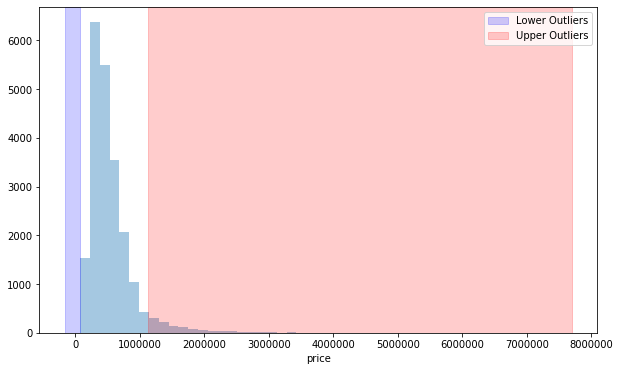

In [132]:
calc_interquartile(df, 'price')
plt.figure(figsize = (10,6))
sns.distplot(df['price'], kde=False)
print(upper, lower)
plt.axvspan(xmin = lower,xmax= df['price'].min(),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = upper,xmax= df['price'].max(),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()

In [133]:
def z_score(data, column):
    global zscore, outlier
    zscore = []
    outlier =[]
    threshold = 3
    mean = np.mean(data[column])
    std = np.std(data[column])
    for i in data[column]:
        z = (i-mean)/std
        zscore.append(z)
        if np.abs(z) > threshold:
            outlier.append(i)
    return print('total outliers', len(outlier))

total outliers 406
1129575.0 -162625.0


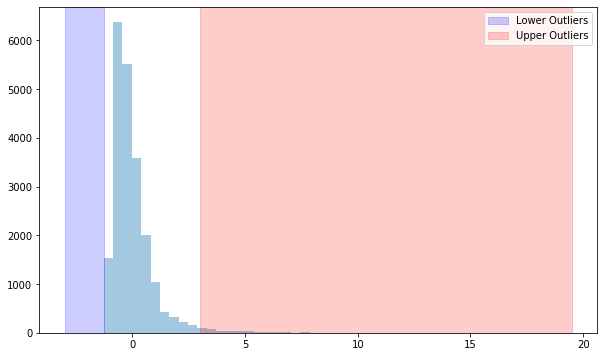

In [134]:
z_score(df, 'price')
plt.figure(figsize = (10,6))
sns.distplot(zscore, kde=False)
print(upper, lower)
plt.axvspan(xmin = -3 ,xmax= min(zscore),alpha=0.2, color='blue', label='Lower Outliers')
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red', label='Upper Outliers')
plt.legend()
plt.show()

In [135]:
dj=[]
for i in df.price:
    if i in set(outlier):
        dj.append(0.0)
    else:
        dj.append(i)
        
df['P'] = dj

x = df.drop(df[df['P'] == 0.0].index) 
x.shape

(21207, 20)

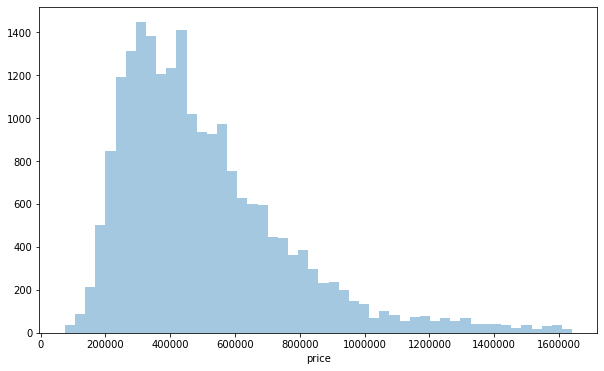

In [136]:
plt.figure(figsize = (10,6))
sns.distplot(x['price'], kde=False)
plt.show()

In [137]:
X = x.drop(['price','P'], axis=1)
Y = x['price']

In [138]:
upper_outliers = df[df['price'] > upper]
upper_outliers

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renov_age,P
5,1225000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,3.0,11.0,3890.0,1530.0,98053.0,47.6561,-122.005,4760.0,101930.0,13.0,0.0,1225000.0
21,2000000.0,3.0,2.75,3050.0,44867.0,1.0,0.0,4.0,3.0,9.0,2330.0,720.0,98040.0,47.5316,-122.233,4110.0,20336.0,46.0,0.0,0.0
49,1350000.0,3.0,2.50,2753.0,65005.0,1.0,1.0,2.0,5.0,9.0,2165.0,588.0,98070.0,47.4041,-122.451,2680.0,72513.0,62.0,0.0,1350000.0
69,1325000.0,5.0,2.25,3200.0,20158.0,1.0,0.0,0.0,3.0,8.0,1600.0,1600.0,98004.0,47.6303,-122.215,3390.0,20158.0,49.0,0.0,1325000.0
125,1450000.0,4.0,2.75,2750.0,17789.0,1.5,0.0,0.0,3.0,8.0,1980.0,770.0,98004.0,47.6141,-122.212,3060.0,11275.0,101.0,78.0,1450000.0
153,2250000.0,4.0,3.25,5180.0,19850.0,2.0,0.0,3.0,3.0,12.0,3540.0,1640.0,98006.0,47.5620,-122.162,3160.0,9750.0,9.0,0.0,0.0
216,1505000.0,5.0,3.00,3300.0,33474.0,1.0,0.0,3.0,3.0,9.0,1870.0,1430.0,98040.0,47.5673,-122.210,3836.0,20953.0,58.0,34.0,1505000.0
246,2400000.0,4.0,2.50,3650.0,8354.0,1.0,1.0,4.0,3.0,9.0,1830.0,1820.0,98074.0,47.6338,-122.072,3120.0,18841.0,14.0,0.0,0.0
269,2900000.0,4.0,3.25,5050.0,20100.0,1.5,0.0,2.0,3.0,11.0,4750.0,300.0,98004.0,47.6312,-122.223,3890.0,20060.0,33.0,26.0,0.0
270,1365000.0,4.0,4.75,5310.0,57346.0,2.0,0.0,0.0,4.0,11.0,5310.0,0.0,98077.0,47.7285,-122.042,4180.0,47443.0,25.0,0.0,1365000.0


In [139]:
x_ = df.drop(df[df['price']>upper].index)
x_

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,age,renov_age,P
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0,59.0,0.0,221900.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,98125.0,47.7210,-122.319,1690.0,7639.0,63.0,40.0,538000.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0,82.0,0.0,180000.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,98136.0,47.5208,-122.393,1360.0,5000.0,49.0,0.0,604000.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0,28.0,0.0,510000.0
6,257500.0,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,3.0,7.0,1715.0,0.0,98003.0,47.3097,-122.327,2238.0,6819.0,19.0,0.0,257500.0
7,291850.0,3.0,1.50,1060.0,9711.0,1.0,0.0,0.0,3.0,7.0,1060.0,0.0,98198.0,47.4095,-122.315,1650.0,9711.0,52.0,0.0,291850.0
8,229500.0,3.0,1.00,1780.0,7470.0,1.0,0.0,0.0,3.0,7.0,1050.0,730.0,98146.0,47.5123,-122.337,1780.0,8113.0,55.0,0.0,229500.0
9,323000.0,3.0,2.50,1890.0,6560.0,2.0,0.0,0.0,3.0,7.0,1890.0,0.0,98038.0,47.3684,-122.031,2390.0,7570.0,12.0,0.0,323000.0
10,662500.0,3.0,2.50,3560.0,9796.0,1.0,0.0,0.0,3.0,8.0,1860.0,1700.0,98007.0,47.6007,-122.145,2210.0,8925.0,50.0,0.0,662500.0


In [140]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
r2_score(y_test, pred)

0.7084573254104335